In [1]:
!pip install -q --upgrade tf-nightly-gpu-2.0-preview
!pip install -q tfp-nightly

    100% |████████████████████████████████| 345.1MB 50kB/s 
    100% |████████████████████████████████| 430kB 12.6MB/s 
    100% |████████████████████████████████| 61kB 27.4MB/s 
    100% |████████████████████████████████| 3.1MB 6.6MB/s 
thinc 6.12.1 has requirement wrapt<1.11.0,>=1.10.0, but you'll have wrapt 1.11.1 which is incompatible.
    100% |████████████████████████████████| 952kB 9.4MB/s 


In [0]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions

%matplotlib inline

In [0]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_val=x_train[50000:60000]
y_val=y_train[50000:60000]

x_train=x_train[0:50000]
y_train=y_train[0:50000]


In [22]:
x_train=np.reshape(x_train, (len(x_train),28,28,1))
x_val=np.reshape(x_val, (len(x_val),28,28,1))
x_test=np.reshape(x_test, (len(x_test),28,28,1))

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(50000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 28, 28, 1)


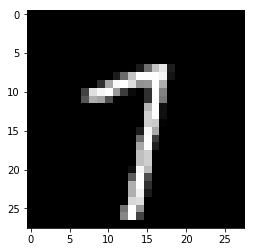

In [23]:
plt.imshow(x_train[42,:,:,0],cmap="gray")

In [24]:
from tensorflow.keras.utils import to_categorical
y_train=to_categorical(y_train,10)
print(y_train.shape)
y_val=to_categorical(y_val,10)
print(y_val.shape)
y_test=to_categorical(y_test,10)
print(y_test.shape)


(50000, 10)
(10000, 10)
(10000, 10)


In [0]:
# here we center and standardize the data
X_mean = np.mean( x_train, axis = 0)
X_std = np.std( x_train, axis = 0)

x_train = (x_train - X_mean ) / (X_std + 0.0001)
x_val = (x_val - X_mean ) / (X_std + 0.0001)
x_test = (x_test - X_mean ) / (X_std + 0.0001)

In [0]:
# here we define  hyperparameter of the NN
batch_size = 128
nb_classes = 10
nb_epoch = 30
img_rows, img_cols = 28, 28
kernel_size = (3, 3)
input_shape = (img_rows, img_cols, 1)
pool_size = (2, 2)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Flatten

In [0]:
### a deeper CNN model
model = Sequential()

model.add(Convolution2D(8,kernel_size,padding='same',input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(8, kernel_size,padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))

model.add(Convolution2D(16, kernel_size,padding='same'))
model.add(Activation('relu'))

# here is your code comming:

model.add(Convolution2D(16,kernel_size,padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))

# end of your code

model.add(Flatten())#macht einen vektor aus dem output
model.add(Dense(40))
model.add(Dropout(0.3))
model.add(Activation('relu'))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [45]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 28, 28, 8)         80        
_________________________________________________________________
activation_18 (Activation)   (None, 28, 28, 8)         0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 28, 28, 8)         584       
_________________________________________________________________
activation_19 (Activation)   (None, 28, 28, 8)         0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 14, 14, 16)        1168      
_________________________________________________________________
activation_20 (Activation)   (None, 14, 14, 16)       

In [46]:
history=model.fit(x_train, y_train, 
                  batch_size=128, 
                  epochs=30,
                  verbose=1, 
                  validation_data=(x_val, y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 3s 59us/sample - loss: 0.4732 - accuracy: 0.8563 - val_loss: 0.1228 - val_accuracy: 0.9648
Epoch 2/30
50000/50000 [==============================] - 2s 46us/sample - loss: 0.1563 - accuracy: 0.9535 - val_loss: 0.0795 - val_accuracy: 0.9760
Epoch 3/30
50000/50000 [==============================] - 2s 47us/sample - loss: 0.1163 - accuracy: 0.9655 - val_loss: 0.0670 - val_accuracy: 0.9797
Epoch 4/30
50000/50000 [==============================] - 2s 46us/sample - loss: 0.0919 - accuracy: 0.9725 - val_loss: 0.0560 - val_accuracy: 0.9834
Epoch 5/30
50000/50000 [==============================] - 2s 47us/sample - loss: 0.0775 - accuracy: 0.9769 - val_loss: 0.0539 - val_accuracy: 0.9856
Epoch 6/30
50000/50000 [==============================] - 2s 46us/sample - loss: 0.0679 - accuracy: 0.9795 - val_loss: 0.0490 - val_accuracy: 0.9867
Epoch 7/30
27904/50000 [===============>..............] 

KeyboardInterrupt: ignored

### TFP Version

In [0]:
negloglik = lambda y, rv_y: -rv_y.log_prob(y)#define negative loglike

In [0]:
x_train=np.array(x_train,dtype="float32")
x_val=np.array(x_val,dtype="float32")
x_test=np.array(x_test,dtype="float32")
# tfp needs float 32

In [134]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Convolution2D(8, kernel_size=(3,3), padding='SAME', activation=tf.nn.relu,input_shape=(28,28,1)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(40,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))
model.add(tfp.layers.DistributionLambda(lambda t: tfd.Multinomial(total_count=1,probs=t+1e-9)))

model.summary()
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss=negloglik,  metrics=['accuracy'])
          
          

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_88 (Conv2D)           (None, 28, 28, 8)         80        
_________________________________________________________________
flatten_28 (Flatten)         (None, 6272)              0         
_________________________________________________________________
dense_44 (Dense)             (None, 40)                250920    
_________________________________________________________________
dense_45 (Dense)             (None, 10)                410       
_________________________________________________________________
distribution_lambda_23 (Dist ((None, 10), (None, 10))  0         
Total params: 251,410
Trainable params: 251,410
Non-trainable params: 0
_________________________________________________________________


In [135]:
prob=model(x_train[0:1])
print(prob.mean())
print(prob.sample())

tf.Tensor(
[[0.05310118 0.1209189  0.10375912 0.12454407 0.09468099 0.05655008
  0.05272216 0.21891882 0.14853825 0.02626646]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]], shape=(1, 10), dtype=float32)


In [136]:
history=model.fit(x_train, y_train, 
                  batch_size=128, 
                  epochs=1,
                  verbose=1, 
                  validation_data=(x_val, y_val))

Train on 50000 samples, validate on 10000 samples
50000/50000 [==============================] - 24s 470us/sample - loss: 0.2958 - accuracy: 0.8603 - val_loss: 0.1444 - val_accuracy: 0.9310


In [110]:
model = tf.keras.Sequential([
  tf.keras.layers.Convolution2D(8, kernel_size=(3,3), padding='SAME', activation=tf.nn.relu,input_shape=(28,28,1)),
  tf.keras.layers.Convolution2D(8, kernel_size=(3,3), padding='SAME', activation=tf.nn.relu),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Convolution2D(16, kernel_size=(3,3), padding='SAME', activation=tf.nn.relu),
  tf.keras.layers.Convolution2D(16, kernel_size=(3,3), padding='SAME', activation=tf.nn.relu) ,   
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),                   
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(40,activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(10,activation=tf.nn.softmax),
  tfp.layers.DistributionLambda(lambda t: tfd.Multinomial(total_count=1,probs=t+1e-9)),
])
#hack with 1e-9 other loss becomes nan
model.summary()
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss=negloglik,  metrics=['accuracy'])


Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_80 (Conv2D)           (None, 28, 28, 8)         80        
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 28, 28, 8)         584       
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_82 (Conv2D)           (None, 14, 14, 16)        1168      
_________________________________________________________________
conv2d_83 (Conv2D)           (None, 14, 14, 16)        2320      
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 7, 7, 16)          0         
_________________________________________________________________
flatten_20 (Flatten)         (None, 784)             

In [111]:
prob=model(x_train[0:1])
print(prob.mean())
print(prob.sample())

tf.Tensor(
[[0.13608217 0.09263817 0.08297928 0.07823779 0.07094522 0.14624892
  0.12137549 0.10279018 0.07375809 0.09494478]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)


In [113]:
history=model.fit(x_train, y_train, 
                  batch_size=128, 
                  epochs=1,
                  verbose=1, 
                  validation_data=(x_val, y_val))

Train on 50000 samples, validate on 10000 samples
50000/50000 [==============================] - 26s 522us/sample - loss: 0.3090 - accuracy: 0.8500 - val_loss: 0.1029 - val_accuracy: 0.9500


In [116]:
prob=model(x_train[0:10])
prob.mean()

<tf.Tensor: id=209747, shape=(10, 10), dtype=float32, numpy=
array([[1.4537994e-08, 5.4566613e-06, 2.2411073e-06, 5.2387315e-01,
        5.7007142e-06, 4.7594410e-01, 5.7467983e-06, 1.1543584e-04,
        1.1109312e-06, 4.6970221e-05],
       [9.9998403e-01, 2.6543759e-08, 7.2789276e-06, 1.7122953e-06,
        3.7602938e-08, 3.0609183e-06, 2.4142325e-06, 4.8184766e-08,
        1.9895101e-07, 1.2002666e-06],
       [1.1129118e-05, 1.4837125e-05, 4.0533942e-06, 2.1655866e-04,
        9.9602425e-01, 6.1249357e-06, 2.3739509e-05, 1.4696424e-04,
        1.8755796e-05, 3.5334853e-03],
       [9.4654561e-06, 9.9854869e-01, 2.7575588e-04, 2.7277003e-05,
        3.3211679e-04, 3.9542731e-05, 8.6747379e-05, 5.5895612e-04,
        3.0851661e-05, 9.0465801e-05],
       [1.3682546e-05, 9.7069449e-07, 2.6637232e-05, 2.3015450e-04,
        4.7895158e-04, 2.6406542e-05, 3.8549851e-07, 8.7074448e-05,
        2.6984114e-04, 9.9886596e-01],
       [3.1097761e-06, 8.3129504e-05, 9.9939811e-01, 2.1894604e-

6
6
tf.Tensor(
[[3.0239060e-05 3.9374891e-07 2.3728835e-07 1.2729131e-09 3.3503056e-08
  8.8820425e-06 9.9996006e-01 1.2436350e-07 2.6905244e-08 8.1375360e-09]], shape=(1, 10), dtype=float32)
tf.Tensor(
[[5.4989220e-03 6.2749401e-04 4.8712245e-04 3.5677909e-05 1.8303840e-04
  2.9802623e-03 6.3194232e-03 3.5265207e-04 1.6402818e-04 9.0208290e-05]], shape=(1, 10), dtype=float32)


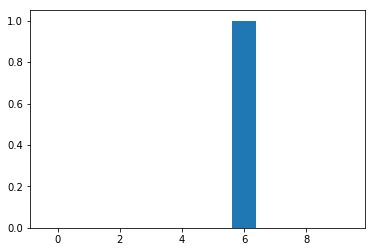

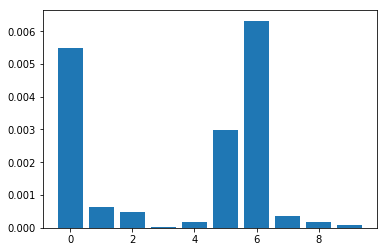

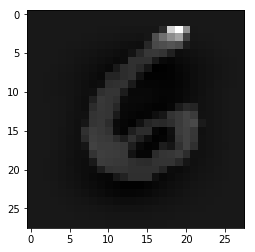

<tf.Tensor: id=209053, shape=(), dtype=float32, numpy=0.99996006>

In [114]:
j=90
prob=model(x_train[j:(j+1)])
print(np.argmax(y_train[j:(j+1)]))
print(np.argmax(prob.mean()))
print(prob.mean())
print(prob.stddev())
plt.bar(range(0,10),prob.mean()[0])
plt.show()
plt.bar(range(0,10),prob.stddev()[0])
plt.show()
plt.imshow(x_train[j,:,:,0],cmap="gray")
plt.show()
prob.mean()[0][6]

### this is just an exp with vi

In [128]:
model = tf.keras.Sequential([
  tfp.layers.Convolution2DFlipout(8, kernel_size=(3,3), padding='SAME', activation=tf.nn.relu,input_shape=(28,28,1)),
  tfp.layers.Convolution2DFlipout(8, kernel_size=(3,3), padding='SAME', activation=tf.nn.relu),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tfp.layers.Convolution2DFlipout(16, kernel_size=(3,3), padding='SAME', activation=tf.nn.relu),
  tfp.layers.Convolution2DFlipout(16, kernel_size=(3,3), padding='SAME', activation=tf.nn.relu) ,   
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),                   
  tf.keras.layers.Flatten(),
  tfp.layers.DenseFlipout(40,activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.3),
  tfp.layers.DenseFlipout(10,activation=tf.nn.softmax),
  tfp.layers.DistributionLambda(lambda t: tfd.Multinomial(total_count=1,probs=t+1e-9)),
])
model.summary()
#  tfp.layers.DistributionLambda(lambda t: tfd.Normal(loc=t, scale=1)),

model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01), loss=negloglik)

#logits = model(features)
#neg_log_likelihood = tf.nn.softmax_cross_entropy_with_logits(
 #   labels=labels, logits=logits)
#kl = sum(model.get_losses_for(inputs=None))
#loss = neg_log_likelihood + kl
#train_op = tf.train.AdamOptimizer().minimize(loss)


model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss=negloglik,  metrics=['accuracy'])


Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_flipout_20 (Conv2DFli (None, 28, 28, 8)         152       
_________________________________________________________________
conv2d_flipout_21 (Conv2DFli (None, 28, 28, 8)         1160      
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_flipout_22 (Conv2DFli (None, 14, 14, 16)        2320      
_________________________________________________________________
conv2d_flipout_23 (Conv2DFli (None, 14, 14, 16)        4624      
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 7, 7, 16)          0         
_________________________________________________________________
flatten_27 (Flatten)         (None, 784)             

In [131]:
prob=model(x_train[0:1])
print(prob.mean())
print(prob.sample())

tf.Tensor(
[[0.09726461 0.08689034 0.08314801 0.1077532  0.10747664 0.11318882
  0.09034761 0.09518476 0.12843882 0.09030716]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]], shape=(1, 10), dtype=float32)


In [132]:
history=model.fit(x_train, y_train, 
                  batch_size=128, 
                  epochs=1,
                  verbose=1, 
                  validation_data=(x_val, y_val))

Train on 50000 samples, validate on 10000 samples


ValueError: ignored

In [101]:
np.sqrt(0.9999504*(1-(0.9999504)))

0.0070425520828732956

In [93]:
p=np.array(np.repeat(0,10),dtype="float32")
p[0] =0.8
p[7]= 0.2
print(p)
la= tfd.Multinomial(total_count= 1,probs=p)
for i in range(0,5):
  print(la.sample())
print(la.mean())
print(la.stddev())

[0.8 0.  0.  0.  0.  0.  0.  0.2 0.  0. ]
tf.Tensor([0. 0. 0. 0. 0. 0. 0. 1. 0. 0.], shape=(10,), dtype=float32)
tf.Tensor([1. 0. 0. 0. 0. 0. 0. 0. 0. 0.], shape=(10,), dtype=float32)
tf.Tensor([1. 0. 0. 0. 0. 0. 0. 0. 0. 0.], shape=(10,), dtype=float32)
tf.Tensor([1. 0. 0. 0. 0. 0. 0. 0. 0. 0.], shape=(10,), dtype=float32)
tf.Tensor([1. 0. 0. 0. 0. 0. 0. 0. 0. 0.], shape=(10,), dtype=float32)
tf.Tensor([0.8 0.  0.  0.  0.  0.  0.  0.2 0.  0. ], shape=(10,), dtype=float32)
tf.Tensor(
[0.39999995 0.         0.         0.         0.         0.
 0.         0.4        0.         0.        ], shape=(10,), dtype=float32)


In [97]:
np.sqrt(0.5*(1-0.5))

0.5

In [96]:
np.sqrt(0.8*(1-0.8))

0.39999999999999997

In [112]:
model.fit(x_train, y_train, epochs=10, verbose=1)


Epoch 1/10
50000/50000 [==============================] - 24s 476us/sample - loss: 2.0019 - accuracy: 0.1493
Epoch 2/10
50000/50000 [==============================] - 20s 403us/sample - loss: 1.8681 - accuracy: 0.1882
Epoch 3/10
50000/50000 [==============================] - 20s 406us/sample - loss: 1.7003 - accuracy: 0.2386
Epoch 4/10
50000/50000 [==============================] - 20s 404us/sample - loss: 1.5278 - accuracy: 0.2983
Epoch 5/10
50000/50000 [==============================] - 22s 445us/sample - loss: 1.3776 - accuracy: 0.3596
Epoch 6/10
50000/50000 [==============================] - 20s 405us/sample - loss: 1.2438 - accuracy: 0.4159
Epoch 7/10
50000/50000 [==============================] - 20s 402us/sample - loss: 1.1352 - accuracy: 0.4578
Epoch 8/10
50000/50000 [==============================] - 21s 411us/sample - loss: 1.0520 - accuracy: 0.4986
Epoch 9/10
50000/50000 [==============================] - 22s 447us/sample - loss: 0.9763 - accuracy: 0.5281
Epoch 10/10
50000/5

In [116]:
model.fit(x_train, y_train, epochs=10, verbose=1,batch_size=128)


Epoch 1/10
50000/50000 [==============================] - 21s 416us/sample - loss: 0.8844 - accuracy: 0.5707
Epoch 2/10
50000/50000 [==============================] - 21s 417us/sample - loss: 0.8652 - accuracy: 0.5733
Epoch 3/10
50000/50000 [==============================] - 23s 451us/sample - loss: 0.8582 - accuracy: 0.5826
Epoch 4/10
50000/50000 [==============================] - 22s 441us/sample - loss: 0.8455 - accuracy: 0.5879
Epoch 5/10
50000/50000 [==============================] - 21s 417us/sample - loss: nan - accuracy: 0.1939
Epoch 6/10
16640/50000 [========>.....................] - ETA: 13s - loss: nan - accuracy: 0.0986

KeyboardInterrupt: ignored

In [56]:
model = tf.keras.Sequential([
  tfp.layers.Convolution2DFlipout(8, kernel_size=(3,3), padding='SAME', activation=tf.nn.relu,input_shape=(28,28,1)),
  tfp.layers.Convolution2DFlipout(8, kernel_size=(3,3), padding='SAME', activation=tf.nn.relu),
  tf.keras.layers.MaxPooling2D(pool_size=[2, 2]),
  tfp.layers.Convolution2DFlipout(16, kernel_size=(3,3), padding='SAME', activation=tf.nn.relu),
  tfp.layers.Convolution2DFlipout(16, kernel_size=(3,3), padding='SAME', activation=tf.nn.relu) ,   
  tf.keras.layers.MaxPooling2D(pool_size=[2, 2]),                   
  tf.keras.layers.Flatten(),
  tfp.layers.DenseFlipout(40,activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.3),
  tfp.layers.DenseFlipout(10,activation=tf.nn.softmax),
  tfp.layers.DistributionLambda(lambda t: tfd.Multinomial(total_count=1,probs=t)),
])
model.summary()
#  tfp.layers.DistributionLambda(lambda t: tfd.Normal(loc=t, scale=1)),

model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01), loss=negloglik)

#logits = model(features)
#neg_log_likelihood = tf.nn.softmax_cross_entropy_with_logits(
 #   labels=labels, logits=logits)
#kl = sum(model.get_losses_for(inputs=None))
#loss = neg_log_likelihood + kl
#train_op = tf.train.AdamOptimizer().minimize(loss)

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_flipout_56 (Conv2DFli (None, 28, 28, 8)         152       
_________________________________________________________________
conv2d_flipout_57 (Conv2DFli (None, 28, 28, 8)         1160      
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_flipout_58 (Conv2DFli (None, 14, 14, 16)        2320      
_________________________________________________________________
conv2d_flipout_59 (Conv2DFli (None, 14, 14, 16)        4624      
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 7, 7, 16)          0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 784)             

In [58]:
model.fit(x_train, y_train, epochs=30, verbose=1);


ValueError: ignored

In [32]:
x_train=np.array(x_train,dtype="float32")
x_train.dtype

dtype('float32')

In [53]:
probs=model(x_train[0:1])
np.sum(probs)
la=tfd.Multinomial(total_count=1,probs=probs)
for i in range(0,4):
  print(la.sample())

tf.Tensor([[18. 10.  5. 18.  7. 13.  9.  1. 18.  1.]], shape=(1, 10), dtype=float32)
tf.Tensor([[24. 10.  2. 18.  5. 13. 12.  2. 11.  3.]], shape=(1, 10), dtype=float32)
tf.Tensor([[18.  8.  6. 21.  3. 17.  9.  3. 14.  1.]], shape=(1, 10), dtype=float32)
tf.Tensor([[16.  6.  4. 20.  7. 16.  9.  2. 18.  2.]], shape=(1, 10), dtype=float32)


In [0]:
""#Build model.
model = tf.keras.Sequential(
    [
tf.keras.layers.Dense(1,input_shape=(1,)),
  tfp.layers.DistributionLambda(lambda t1: tfd.Normal(loc=t1, scale=1)),
    ])


## if you want to use hidden layers
#model = tf.keras.Sequential(
#    [
#tf.keras.layers.Dense(10,input_shape=(1,)),
#        tf.keras.layers.Dense(1),
#  tfp.layers.DistributionLambda(lambda t1: tfd.Normal(loc=t1, scale=1)),
#    ])
#

model.summary()
# Do inference.
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01), loss=negloglik)
